In [3]:
import pandas as pd # library for data analysis
from pandas import DataFrame
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import numpy as np # library to handle data in a vectorized manner


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


Getting LA Crime daa

2018 Tax data to evaluate location 

In [195]:
#https://data.ftb.ca.gov/California-Personal-Income-Tax/Personal-Income-Tax-Statistics-By-Zip-Code/mriu-wsxf
# 2018 is max available

url='https://data.ftb.ca.gov/resource/mriu-wsxf.json?$where=county="Los Angeles" and taxable_year = 2018 limit 10000'

In [196]:
resultsi = requests.get(url).json()
resultsi

[{'taxable_year': '2018',
  'zip_code': '91105',
  'state': 'CA',
  'city': 'Pasadena',
  'county': 'Los Angeles',
  'returns': '6583',
  'ca_agi': '1698045557',
  'total_tax_liability': '144828492',
  'countylatitude': '34.0594833',
  'countylongitude': '-118.242048',
  'geo_county': {'type': 'Point',
   'coordinates': [-118.24204800000001, 34.0594833]},
  'geo_city': {'type': 'Point', 'coordinates': [-118.141452, 34.14955]},
  'geo_zipcode': {'type': 'Point', 'coordinates': [-118.166094, 34.138699]}},
 {'taxable_year': '2018',
  'zip_code': '91206',
  'state': 'CA',
  'city': 'Glendale',
  'county': 'Los Angeles',
  'returns': '15122',
  'ca_agi': '1185019979',
  'total_tax_liability': '55152571',
  'countylatitude': '34.0594833',
  'countylongitude': '-118.242048',
  'geo_county': {'type': 'Point',
   'coordinates': [-118.24204800000001, 34.0594833]},
  'geo_city': {'type': 'Point', 'coordinates': [-118.246437, 34.148138]},
  'geo_zipcode': {'type': 'Point',
   'coordinates': [-118.

In [197]:
income = pd.DataFrame.from_records(data=resultsi)
# filter columns df.sort(['A', 'B'], ascending=[1, 0])df.sort_values(by='col1', ascending=False)df.sort_values(['Total Due'], inplace=True)
income.sort_values(['zip_code'],ascending=True,inplace=True)
income.head()

,taxable_year,zip_code,state,city,county,returns,ca_agi,total_tax_liability,countylatitude,countylongitude,geo_county,geo_city,geo_zipcode
397,2018,90001,CA,Los Angeles,Los Angeles,20706,649653981,6517662,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...","{'type': 'Point', 'coordinates': [-118.2491540..."
78,2018,90002,CA,Los Angeles,Los Angeles,19393,601443411,5751798,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...","{'type': 'Point', 'coordinates': [-118.247877,..."
278,2018,90003,CA,Los Angeles,Los Angeles,26141,770991243,6995821,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...","{'type': 'Point', 'coordinates': [-118.274809,..."
157,2018,90004,CA,Los Angeles,Los Angeles,27105,2049653957,124846684,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...","{'type': 'Point', 'coordinates': [-118.3094529..."
418,2018,90005,CA,Los Angeles,Los Angeles,16131,902096771,42484343,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...","{'type': 'Point', 'coordinates': [-118.308884,..."


In [74]:
#Average Home Price by zip city of LA
#wikiurl="http://www.laalmanac.com/economy/ec37b.php"
wikiurl ="http://www.laalmanac.com/economy/ec37c.php" 
table=""
response2=requests.get(wikiurl)
print(response2.status_code)


200


In [75]:
soup = BeautifulSoup(response2.text, 'html.parser')
indiatable=soup.find('table')

In [76]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])


In [77]:
# Clean data
df.columns = ["zip_code","City/community","2020","2019","2018","2017","2016","2015"]
#df.set_index("zip code",inplace= True)
df.head()

,zip_code,City/community,2020,2019,2018,2017,2016,2015
0,90001,"Los Angeles (South Los Angeles), Florence-Graham","$525,958","$468,457","$422,180","$382,238","$326,666","$294,107"
1,90002,"Los Angeles (Southeast Los Angeles, Watts)","$462,600","$420,276","$409,196","$377,497","$351,104","$326,200"
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...","$504,552","$449,413","$413,749","$360,940","$307,403","$259,507"
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...","$722,935","$696,061","$696,001","$673,947","$640,130","$604,886"
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...","$684,877","$660,619","$646,850","$621,243","$582,325","$551,261"


In [78]:
df.shape

(57, 8)

In [79]:
# Create average house data by zip and year
column=['zip_code','city/community','price']
df3a=[]
df3a=pd.DataFrame(columns=column)
ran=df.shape[0]
i=0
for i in range(ran) :
    post = df.iloc[i][0]   
    city = df.iloc[i][1]
    price1 = df.iloc[i][2]
    i=i+1    

    df3a=df3a.append({'zip_code':post,'city/community':city,'price':price1},ignore_index=True)

df3a.head()


,zip_code,city/community,price
0,90001,"Los Angeles (South Los Angeles), Florence-Graham","$525,958"
1,90002,"Los Angeles (Southeast Los Angeles, Watts)","$462,600"
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...","$504,552"
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...","$722,935"
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...","$684,877"


In [84]:
olumn=['yearmonth','zip_code','city/community','price']
df4a=[]
df4a=pd.DataFrame(columns=column)
ran=df.shape[0]
i=0
for i in range(ran) :
    post = df.iloc[i][0]   
    city = df.iloc[i][1]
    price1 = df.iloc[i][2]
    price2 = df.iloc[i][3]
    price3 = df.iloc[i][4]
    price4 = df.iloc[i][5]
    price5 = df.iloc[i][6]
    price6 = df.iloc[i][7]
    i=i+1    

    df4a=df4a.append({'year':'2020','zip_code':post,'city/community':city,'price':price1},ignore_index=True)
    df4a=df4a.append({'year':'2019','zip_code':post,'city/community':city,'price':price2},ignore_index=True)

    df4a=df4a.append({'year':'2018','zip_code':post,'city/community':city,'price':price3},ignore_index=True)

    df4a=df4a.append({'year':'2017','zip_code':post,'city/community':city,'price':price4},ignore_index=True)
    df4a=df4a.append({'year':'2016','zip_code':post,'city/community':city,'price':price5},ignore_index=True)
    df4a=df4a.append({'year':'2015','zip_code':post,'city/community':city,'price':price6},ignore_index=True)




df4a.head()

,zip_code,city/community,price,year
0,90001,"Los Angeles (South Los Angeles), Florence-Graham","$525,958",2020
1,90001,"Los Angeles (South Los Angeles), Florence-Graham","$468,457",2019
2,90001,"Los Angeles (South Los Angeles), Florence-Graham","$422,180",2018
3,90001,"Los Angeles (South Los Angeles), Florence-Graham","$382,238",2017
4,90001,"Los Angeles (South Los Angeles), Florence-Graham","$326,666",2016


In [85]:

df3a.dropna(subset=['price'],inplace=True)
df3a.shape
df4a.dropna(subset=['price'],inplace=True)
df4a.shape
df4a['zip_code']=df4a['zip_code'].astype(str)
df4a['price'] = df4a['price'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [86]:
#Correct Data type

df3a['zip_code']=df3a['zip_code'].astype(str)

income['zip_code']=income['zip_code'].astype(str)
income['ca_agi'] = income['ca_agi'].astype(int)
income['returns'] = income['returns'].astype(int)
income['total_tax_liability']=income['total_tax_liability'].astype(int)
#change NaN to 0  .fillna(0)


NameError: name 'income' is not defined

In [261]:
# marge income andhouse price table˘˘˘˘˘˘

la_df = pd.merge(df3a, income, on='zip_code',how='left')


la_df.drop(['taxable_year','state','county','countylatitude','countylongitude','geo_county','geo_city'],axis = 'columns', inplace=True)
la_df['price'] = la_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(int)
la_df['income'] = la_df['ca_agi']/la_df['returns']
la_df['liability']=la_df['total_tax_liability']/la_df['returns']
#merge_df['total_tax_liabillity'] = merge_df['total_tax_liabillity'].astype(float)
la_df.drop(['ca_agi','total_tax_liability'],axis = 'columns', inplace=True)
la_df.rename({'zip_code':'zip code'},axis ='columns',inplace =True)

#print (geo.format() 'geo_zipcode': {'type': 'Point', 'coordinates': [-118.166094, 34.138699]}},)
#la_df['lat']=geo.latitude
#la_df['lot']=geo.longitude
#la_df
#la_df.head()
#Find top price and bottom price

#new_df2 = la_df.sort_values(by = [ 'income'], ascending=[True])
#highest1=new_df2.head()
#new_df2 = la_df.sort_values(by = [ 'income'], ascending=[False])
#lowest1=new_df2.head()
#print (highest1)
#print (lowest1)
#new_df1 = la_df.sort_values(by = [ 'price'], ascending=[True])
#highest=new_df1.head()
#new_df1 = la_df.sort_values(by = [ 'price'], ascending=[False])
#lowest=new_df1.head()
#print (highest)
#print (lowest)

In [262]:
la_df.shape

(56, 8)

Now I am going to get venuns from Foursquare. First retrive latitude, longitude of los angeles 

In [263]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of LA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of LA are 34.0536909, -118.242766.


Find appropriate GeoJson
To map out the data by ZIP code in Folium, we will need a GeoJson to represent the boundaries of each Zip Code

Getting Venue from Foursquare

In [264]:
CLIENT_ID = '33UPSQ030ZRDVSJ5NBR3BYNVXE0UHGR0GI30W211XTIE2ITS' # your Foursquare ID
CLIENT_SECRET = '10R11XLJXFFGK2Z1G0UR4DFN43120BVNUQETFJL2N4EKB1ML' # your Foursquare Secret
VERSION = '20201201' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 33UPSQ030ZRDVSJ5NBR3BYNVXE0UHGR0GI30W211XTIE2ITS
CLIENT_SECRET:10R11XLJXFFGK2Z1G0UR4DFN43120BVNUQETFJL2N4EKB1ML


In [18]:
geo = pd.DataFrame.from_records(data=la_df.loc[3, 'geo_zipcode'])
neighborhood_latitude = (geo.coordinates[1])
neighborhood_longitude = (geo.coordinates[0])    

neighborhood_name = la_df.loc[3, 'zip code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 90004 are 34.07646, -118.30945299999999.


In [37]:
#4bf58dd8d48988d16d941735 cafa  4bf58dd8d48988d1e0931735 coffee shop 4bf58dd8d48988d1dc931735 tea room
#4d4b7105d754a06377d81259 out door 4bf58dd8d48988d12f941735 library 4bf58dd8d48988d1ca941735 pizza
radius = 500
LIMIT = 100
#Cat ='4bf58dd8d48988d1ca941735,4bf58dd8d48988d12f941735'
#Cat ='4bf58d
Cat ='4bf58dd8d48988d16d941735,4bf58dd8d48988d1e0931735,4bf58dd8d48988d1dc931735,4d4b7105d754a06377d81259,4bf58dd8d48988d12f941735,4bf58dd8d48988d1ca941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT,
    Cat)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=33UPSQ030ZRDVSJ5NBR3BYNVXE0UHGR0GI30W211XTIE2ITS&client_secret=10R11XLJXFFGK2Z1G0UR4DFN43120BVNUQETFJL2N4EKB1ML&v=20201201&ll=34.07646,-118.30945299999999&radius=500&limit=100&categoryId=4bf58dd8d48988d16d941735,4bf58dd8d48988d1e0931735,4bf58dd8d48988d1dc931735,4d4b7105d754a06377d81259,4bf58dd8d48988d12f941735,4bf58dd8d48988d1ca941735'

In [38]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd44a0930af53624b0aa3f9'},
 'response': {'venues': [{'id': '576822a6498e8ccec4d3a090',
    'name': 'Balcony Coffee and Tea',
    'location': {'address': '314 N Western Ave',
     'crossStreet': 'Beverly',
     'lat': 34.076596618122174,
     'lng': -118.30911928630813,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.076596618122174,
       'lng': -118.30911928630813},
      {'label': 'entrance', 'lat': 34.07673, 'lng': -118.308973}],
     'distance': 34,
     'postalCode': '90004',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['314 N Western Ave (Beverly)',
      'Los Angeles, CA 90004',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffi

In [265]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
Venues_list=[]    

In [266]:
#4bf58dd8d48988d16d941735 cafa  4bf58dd8d48988d1e0931735 coffee shop 4bf58dd8d48988d1dc931735 tea room
#4d4b7105d754a06377d81259 out door 4bf58dd8d48988d12f941735 library 4bf58dd8d48988d1ca941735 pizza
#,4bf58dd8d48988d1e0931735,4bf58dd8d48988d1dc931735,4d4b7105d754a06377d81259,4bf58dd8d48988d12f941735,4bf58dd8d48988d1ca941735'

#def getNearbyVenues(names, latitudes, longitudes, radius=500):

Cat ='4bf58dd8d48988d1ca941735,4bf58dd8d48988d16d941735,4bf58dd8d48988d1e0931735,4bf58dd8d48988d1dc931735'
name=la_df['zip code']
radius = 500
for name, loc in zip(la_df['zip code'], la_df['geo_zipcode'] ):
    
        #print(name)
    geo = pd.DataFrame.from_records(data=loc)
    lng = (geo.coordinates[0])
    lat= (geo.coordinates[1])        
        # create the API request URL

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT,
        Cat)
    url
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']
    #return(nearby_venues)

In [56]:
#4bf58dd8d48988d16d941735 cafa  4bf58dd8d48988d1e0931735 coffee shop 4bf58dd8d48988d1dc931735 tea room
#4d4b7105d754a06377d81259 out door 4bf58dd8d48988d12f941735 library 4bf58dd8d48988d1ca941735 pizza
#,4bf58dd8d48988d1e0931735,4bf58dd8d48988d1dc931735,4d4b7105d754a06377d81259,4bf58dd8d48988d12f941735,4bf58dd8d48988d1ca941735'

#def getNearbyVenues(names, latitudes, longitudes, radius=500):

Cat ='4d4b7105d754a06377d81259'
name=la_df['zip code']
radius = 500
for name, loc in zip(la_df['zip code'], la_df['geo_zipcode'] ):
    
        #print(name)
    geo = pd.DataFrame.from_records(data=loc)
    lng = (geo.coordinates[0])
    lat= (geo.coordinates[1])        
        # create the API request URL

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT,
        Cat)
    url
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']
    #return(nearby_venues)

In [267]:
nearby_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,90001,33.973252,-118.249154,WW (Weight Watchers),33.974227,-118.245344,Weight Loss Center
1,90002,33.949079,-118.247877,Watts Senior Center & Rose Garden,33.945900,-118.244087,Park
2,90003,33.963074,-118.274809,@basketball(culver city),33.962238,-118.276076,Basketball Court
3,90004,34.076460,-118.309453,Sun in the Neawen Yard,34.076174,-118.313878,Garden
4,90004,34.076460,-118.309453,Compound Fitness,34.078245,-118.313886,Gym / Fitness Center


In [268]:
nearby_venues.groupby(['Neighborhood','Venue Category']).count()
nearby_venues.to_csv('venuesdata.csv')

analyize each neighborhood

In [269]:
# one hot encoding
onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot1 = nearby_venues['Neighborhood'] 
outdoor = onehot['Waterfront']+onehot['Waterfall']+onehot['Bay'] + onehot['Beach']+onehot['Nature Preserve']+onehot['Outdoors & Recreation']+onehot['Park']+onehot['Trail']+onehot['Bike Trail']
Sports = onehot['Recreation Center']+onehot['Track']+onehot['Sports Club']+onehot['Track']+onehot['Yoga Studio']+onehot['Climbing Gym']+onehot['Cycle Studio']+onehot['Gym / Fitness Center']+onehot['Pilates Studio']
Coffe = onehot['Café']+onehot['Coffee Shop']+onehot['Tea Room']
#Lib = onehot['College Library']+onehot['Library']
#onehot.drop(labels=['Neighborhood'],axis=1,inplace=True)
#onehot2=onehot2.append({'zip_code':onehot1,'beach':Beach,'sports':Sports,'coffee':Coffe,'librart':Lib},ignore_index=True)
onehot.insert(0,'Neighborhood',onehot1)
onehot.insert(1,'outdoor',outdoor)
onehot.insert(2,'sports',Sports)
onehot.insert(3,'Coffee/tea',Coffe)
#onehot.insert(4,'lib',Lib)
onehot2 = onehot[['Neighborhood','outdoor','sports','Coffee/tea']]
onehot2.head


<bound method NDFrame.head of      Neighborhood  outdoor  sports  Coffee/tea
0           90001        0       0           0
1           90002        1       0           0
2           90003        0       0           0
3           90004        0       0           0
4           90004        0       1           0
...           ...      ...     ...         ...
2194        90066        0       0           1
2195        90066        0       0           1
2196        90066        0       0           1
2197        90066        0       0           1
2198        90066        0       0           1

[2199 rows x 4 columns]>

Rank by each neighborhood

In [270]:
la_grouped = onehot2.groupby('Neighborhood').mean().reset_index()
la_grouped.head()

,Neighborhood,outdoor,sports,Coffee/tea
0,90001,0.000000,0.000000,0.000000
1,90002,1.000000,0.000000,0.000000
2,90003,0.000000,0.000000,0.000000
3,90004,0.000000,0.071429,0.857143
4,90005,0.013514,0.094595,0.783784


In [271]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [272]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90001,Coffee/tea,sports,outdoor
1,90002,outdoor,Coffee/tea,sports
2,90003,Coffee/tea,sports,outdoor
3,90004,Coffee/tea,sports,outdoor
4,90005,Coffee/tea,sports,outdoor


Cluster Neighborhoods Run k-means to cluster the neighborhood into 5 clusters.

In [273]:
kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 4, 2, 1, 1, 1, 1, 0, 1, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [274]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.rename({'Neighborhood':'zip code'},axis ='columns',inplace =True)
la_merged = la_df

## merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(neighborhoods_venues_sorted.set_index('zip code'), on='zip code')

#neighborhoods_venues_sorted.head() # check the last columns!
la_merged.head()



,zip code,city/community,price,city,returns,geo_zipcode,income,liability,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",525958,Los Angeles,20706,"{'type': 'Point', 'coordinates': [-118.2491540...",31375.156042,314.771660,2.0,Coffee/tea,sports,outdoor
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",462600,Los Angeles,19393,"{'type': 'Point', 'coordinates': [-118.247877,...",31013.428093,296.591451,4.0,outdoor,Coffee/tea,sports
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",504552,Los Angeles,26141,"{'type': 'Point', 'coordinates': [-118.274809,...",29493.563483,267.618722,2.0,Coffee/tea,sports,outdoor
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",722935,Los Angeles,27105,"{'type': 'Point', 'coordinates': [-118.3094529...",75619.035492,4606.038886,1.0,Coffee/tea,sports,outdoor
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",684877,Los Angeles,16131,"{'type': 'Point', 'coordinates': [-118.308884,...",55923.177174,2633.707954,1.0,Coffee/tea,sports,outdoor


In [275]:
#l
la_merged['Cluster Labels'].fillna(0, inplace=True)
la_merged['Cluster Labels']=la_merged['Cluster Labels'].astype(int)
la_merged.head()

,zip code,city/community,price,city,returns,geo_zipcode,income,liability,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",525958,Los Angeles,20706,"{'type': 'Point', 'coordinates': [-118.2491540...",31375.156042,314.771660,2,Coffee/tea,sports,outdoor
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",462600,Los Angeles,19393,"{'type': 'Point', 'coordinates': [-118.247877,...",31013.428093,296.591451,4,outdoor,Coffee/tea,sports
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",504552,Los Angeles,26141,"{'type': 'Point', 'coordinates': [-118.274809,...",29493.563483,267.618722,2,Coffee/tea,sports,outdoor
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",722935,Los Angeles,27105,"{'type': 'Point', 'coordinates': [-118.3094529...",75619.035492,4606.038886,1,Coffee/tea,sports,outdoor
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",684877,Los Angeles,16131,"{'type': 'Point', 'coordinates': [-118.308884,...",55923.177174,2633.707954,1,Coffee/tea,sports,outdoor


In [276]:
la_merged.shape

(56, 12)

In [1]:
lamap=folium.Map(location = [latitude,longitude],
default_zoom_start=12)
Zipc='ZIPCodes.geojson'
folium.Choropleth(
    geo_data=Zipc,
    data=la_merged,
    columns=['zip code','price'],
    key_on='feature.properties.zipcode',
    fill_opacity=0.3,
    line_opacity=0.2,
    line_weight=2,
    legend_name='HOME PRICE',
    fill_color='RdYlGn'
).add_to(lamap)
folium.LayerControl().add_to(lamap)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for loc, poi, cluster ,hincome ,liab,hprice in zip(la_merged['geo_zipcode'], la_merged['zip code'], la_merged['Cluster Labels'],la_merged['income'],la_merged['liability'],la_merged['price']):
    geo = pd.DataFrame.from_records(data=loc)
    lon = (geo.coordinates[0])
    lat= (geo.coordinates[1])
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+' Unemployment ' + unemp +'Income '+income +'price'+price , parse_html=True)
    label =  str(poi) + ' Cluster ' + str(cluster) + 'liability:' + '{}'.format(liab) +'Income :'+'{}'.format(hincome) +'price: '+'{}'.format( hprice)
    label = folium.Popup(label, parse_html=True)
    if cluster != 0 :
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(lamap)
lamap

NameError: name 'folium' is not defined

In [250]:
la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[0] +list(range(5, la_merged.shape[1]))]]

,zip code,geo_zipcode,income,liability,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90001,"{'type': 'Point', 'coordinates': [-118.2491540...",31375.156042,314.771660,4,Coffee/tea,sports,outdoor
2,90003,"{'type': 'Point', 'coordinates': [-118.274809,...",29493.563483,267.618722,4,Coffee/tea,sports,outdoor
20,90022,"{'type': 'Point', 'coordinates': [-118.1557550...",37812.346509,825.096784,4,outdoor,Coffee/tea,sports
25,90027,"{'type': 'Point', 'coordinates': [-118.29056, ...",93096.908137,5971.291078,4,Coffee/tea,outdoor,sports
28,90031,"{'type': 'Point', 'coordinates': [-118.213962,...",41225.295539,1091.085348,4,Coffee/tea,sports,outdoor
41,90044,"{'type': 'Point', 'coordinates': [-118.2917810...",31869.967759,383.536976,4,Coffee/tea,sports,outdoor
70,90232,"{'type': 'Point', 'coordinates': [-118.3920719...",106142.397457,6165.903353,4,Coffee/tea,sports,outdoor
74,90245,"{'type': 'Point', 'coordinates': [-118.403388,...",193782.714120,16909.784189,4,sports,outdoor,Coffee/tea
76,90248,"{'type': 'Point', 'coordinates': [-118.286071,...",62512.397849,2471.113830,4,Coffee/tea,sports,outdoor
81,90260,"{'type': 'Point', 'coordinates': [-118.3522569...",47945.409588,1350.992534,4,Coffee/tea,outdoor,sports


I do not have history of un

In [278]:
#downloaded unemployment ratehttp://zipatlas.com/us/ca/los-angeles/zip-code-comparison/unemployment-rate.htm
La_Unemployment = 'LAUnemployment.xls'
une = pd.read_excel(La_Unemployment)
une['zip code']=une['zip_code'].astype(str)

une.drop(labels=['lat'],axis=1,inplace=True)
une.drop(labels=['lon'],axis=1,inplace=True)
#onehot.drop(labels=['Neighborhood'],axis=1,inplace=True)
une.head()


,no,zip_code,city,labor,unemployment,rank,zip code
0,1,90013,"Los Angeles, California",9727,50.19 %,#60,90013
1,2,90021,"Los Angeles, California",3003,40.31 %,#113,90021
2,3,90059,"Los Angeles, California",38123,19.01 %,#950,90059
3,4,90014,"Los Angeles, California",3518,18.77 %,#975,90014
4,5,90002,"Los Angeles, California",44584,18.50 %,"#1,019",90002


In [ ]:
#Current Unemployment by city 

La_unurl = 'http://www.laalmanac.com/employment/em03.php'
une = pd.read_excel(La_Unemployment)
une['zip code']=une['zip_code'].astype(str)

une.drop(labels=['lat'],axis=1,inplace=True)
une.drop(labels=['lon'],axis=1,inplace=True)
#onehot.drop(labels=['Neighborhood'],axis=1,inplace=True)
une.shape

In [1064]:
# just fo test
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes


rng = np.random.RandomState(42)

X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:400]
y_california = y_california[:400]

In [1069]:
X_california[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [99]:
#https://fred.stlouisfed.org/series/CASTHPI
#Unenployment LA County 1990 ~
unemp = pd.read_excel('CALOSA7URN.xls') 
print (unemp.head())
# average price
hprice = pd.read_excel('CASTHPI.xls')  # Every 3 month 
print (hprice.head())
# Average list price from 2016-0701 
avprice = pd.read_excel('AVELISPRI6037.xls')
print (avprice.head())
# employee person form 1990~
emp =pd.read_excel('LAUCN060370000000005.xls')
print (emp.head())
#https://fred.stlouisfed.org/series/MEDLISPRIPERSQUFEEYY6037
#Listing Price per seq
#listsq =pd.read_excel('MEDLISPRIPERSQUFEEYY6037.xls')
https://car.sharefile.com/share/view/s0c02663a5c54e23a
#Merge 
df5 = pd.merge(Unemp, Hprice, on='observation_date',how='left')


  observation_date  unemploymentrate
0       1990-01-01               6.0
1       1990-02-01               5.7
2       1990-03-01               5.4
3       1990-04-01               5.6
4       1990-05-01               5.5
  observation_date  CASTHPI
0       1975-01-01    41.71
1       1975-04-01    42.79
2       1975-07-01    44.33
3       1975-10-01    45.90
4       1976-01-01    47.83
  observation_date  ListPrice
0       2016-07-01    1412502
1       2016-08-01    1364185
2       2016-09-01    1369992
3       2016-10-01    1387274
4       2016-11-01    1415359
  observation_date  Employee 
0       1990-01-01    4229652
1       1990-02-01    4256190
2       1990-03-01    4272064
3       1990-04-01    4251282
4       1990-05-01    4260654


In [68]:
#current year foreclosure 2020
import urllib, json
with urllib.request.urlopen("https://data.lacity.org/resource/kde4-k7yx.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea = foreclose.copy()
#2015
with urllib.request.urlopen("https://data.lacity.org/resource/f37w-ye7d.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea=foreclosea.append(foreclose)
#2016
with urllib.request.urlopen("https://data.lacity.org/resource/hbin-6gap.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea=foreclosea.append(foreclose)
#2017
with urllib.request.urlopen("https://data.lacity.org/resource/r53k-qp8f.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea=foreclosea.append(foreclose)
# 2018
with urllib.request.urlopen("https://data.lacity.org/resource/e6cg-sqdy.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea=foreclosea.append(foreclose)
#
with urllib.request.urlopen("https://data.lacity.org/resource/rsxb-x48z.json") as url:
    data1 = json.loads(url.read().decode())
foreclose = pd.DataFrame.from_records(data=data1)
foreclosea=foreclosea.append(foreclose)
foreclosea.shape


(6000, 28)

In [69]:
foreclosea['regdate'] = foreclosea['registered_date'].astype('datetime64[ns]')
foreclosea['yearmonth']=foreclosea['regdate'].dt.strftime('%Y-%m')
foreclosea['yearmonth1st'] = foreclosea['yearmonth'] + '-01'
select_col=foreclosea[["yearmonth1st","propertyzip","apn"]]
forecls=select_col.copy()
forecls.sort_values(['yearmonth1st','propertyzip'],ascending=True,inplace=True)
foreclose_grp=(forecls.groupby(['propertyzip','yearmonth1st']).count())



In [66]:
foreclose_grp.head

<bound method NDFrame.head of                           apn
propertyzip yearmonth1st     
90001       2017-01-01      2
            2017-04-01      1
            2017-06-01      2
            2019-02-01      2
            2019-03-01      2
...                       ...
99999       2019-07-01      2
            2019-11-01      1
            2019-12-01      1
            2020-01-01      1
            2020-02-01      1

[1401 rows x 1 columns]>

<Figure size 432x288 with 0 Axes>

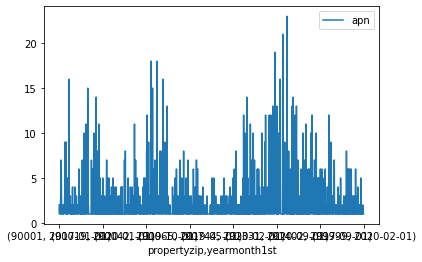

In [90]:
#Plot relation
import matplotlib as mp
import matplotlib.pyplot as plt
#df = df.cumsum()

plt.figure();

foreclose_grp.plot();

In [89]:
#Plot relation
import matplotlib as mp
import matplotlib.pyplot as plt
#plt.scatter(Unemp)
ax=unemp.plot(kind='scatter',
            x='observation_date',
            y='CAUR',
            figsize=(14,8),
               alpha=0.5)
               
                
            
ax.plot()


NameError: name 'unemp' is not defined